<h2> 1. Data Management </h2>

In [150]:
import pandas as pd ## manip dataframe
import numpy as np ## opérations sur vecteurs
import matplotlib.pyplot as plt  ## visualisation
%matplotlib inline
import seaborn as sns ## visualisation
from PIL import Image               # to load images
from IPython.display import display # to display images
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from keras.layers import Dense, Dropout
from tensorflow.keras import layers
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier

<h2>1.a Import Train dataset</h2>

In [170]:
df_train = pd.read_csv('train.csv')

<h2>1.b Description de la base</h2>

In [171]:
df_train.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6338,6338,6338.000000,6338,6338,6338.000000,6338,6338,6338,6338,...,6338,6338,6338,6338,6338,6338,6338,6338.000000,6338,6338
unique,6338,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,5920,2
top,0104-PPXDV,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3204,NaN,3264,4437,NaN,5726,3043,2798,3148,...,2776,3146,2533,2512,3497,3756,2126,NaN,11,4672
mean,NaN,NaN,0.160461,NaN,NaN,32.435942,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.773391,NaN,NaN
std,NaN,NaN,0.367062,NaN,NaN,24.504535,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.099748,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.550000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.900000,NaN,NaN


In [153]:
df_train.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
5,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
6,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
8,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
9,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No


In [154]:
df_train.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [155]:
df_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [156]:
churn_percents = df_train["Churn"].value_counts(normalize=True)
print(f"La dataframe compte : \n - {len(df_train)} lignes \n - {len(df_train.columns)} colonnes")
print(f"Il y a : \n - {'%.2f' % (churn_percents[0]*100)} % de churn positif \n - {'%.2f' % (churn_percents[1]*100)} % de churn negatif")


La dataframe compte : 
 - 6338 lignes 
 - 21 colonnes
Il y a : 
 - 73.71 % de churn positif 
 - 26.29 % de churn negatif


<h2>2.	Exploration des données</h2>

In [157]:
def get_binary(el):
    if el == "Yes" or el == "No" or el == "No phone service" or el == "No internet service":
        return 0 if el == "No" or el == "No phone service" or el == "No internet service" else 1
    else:
        return el
def convert_to_binary(row):
    row = [get_binary(d) for d in row]
    return row

def cleen_data(data):
    dataframe = data.apply(convert_to_binary)
    dataframe["TotalCharges"] = pd.to_numeric(dataframe["TotalCharges"], errors="coerce").fillna(0, downcast='infer')
    dataframe = pd.get_dummies(dataframe, columns=['gender', 'InternetService','Contract', 'PaymentMethod'])
    dataframe = dataframe.drop("customerID", axis=1)
    return dataframe

df_train = cleen_data(df_train)

In [158]:
df_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,8,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0


In [159]:
df_train.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.013542,-0.208297,0.015099,0.017759,0.143978,-0.040309,0.060669,0.065924,-0.064362,...,-0.184104,-0.109267,0.257141,0.138190,-0.042932,-0.120177,-0.016113,-0.032357,0.174685,-0.148821
Partner,0.013542,1.000000,0.450571,0.382212,0.014779,0.145500,0.145387,0.152383,0.155244,0.121627,...,-0.002609,0.002973,-0.000674,-0.279368,0.080246,0.249193,0.113883,0.079781,-0.081665,-0.098727
Dependents,-0.208297,0.450571,1.000000,0.160469,-0.006340,-0.020719,0.080201,0.024992,0.012846,0.057641,...,0.141125,0.051788,-0.166574,-0.228396,0.064848,0.204447,0.045057,0.067560,-0.148528,0.056335
tenure,0.015099,0.382212,0.160469,1.000000,0.007975,0.328937,0.323991,0.362648,0.359332,0.316028,...,-0.040005,0.012107,0.021633,-0.646062,0.203365,0.559321,0.238796,0.229467,-0.205268,-0.229726
PhoneService,0.017759,0.014779,-0.006340,0.007975,1.000000,0.280102,-0.090556,-0.051297,-0.074972,-0.097385,...,0.172000,-0.453725,0.290651,0.006092,-0.009271,0.001735,0.007106,-0.002096,-0.000806,-0.004047
MultipleLines,0.143978,0.145500,-0.020719,0.328937,0.280102,1.000000,0.099056,0.204488,0.198662,0.097720,...,-0.215166,-0.203271,0.372705,-0.083057,-0.005418,0.101991,0.073503,0.058657,0.083883,-0.224353
OnlineSecurity,-0.040309,0.145387,0.080201,0.323991,-0.090556,0.099056,1.000000,0.279142,0.269429,0.352672,...,-0.333403,0.322540,-0.031412,-0.243473,0.092985,0.195203,0.090059,0.115413,-0.108761,-0.079700
OnlineBackup,0.060669,0.152383,0.024992,0.362648,-0.051297,0.204488,0.279142,1.000000,0.306514,0.292516,...,-0.379482,0.152672,0.169076,-0.168341,0.080600,0.119421,0.090172,0.079811,0.005238,-0.173098
DeviceProtection,0.065924,0.155244,0.012846,0.359332,-0.074972,0.198662,0.269429,0.306514,1.000000,0.329733,...,-0.382012,0.147812,0.175817,-0.217695,0.095145,0.163091,0.084234,0.106155,-0.006281,-0.180122
TechSupport,-0.064362,0.121627,0.057641,0.316028,-0.097385,0.097720,0.352672,0.292516,0.329733,1.000000,...,-0.333661,0.307221,-0.016567,-0.281344,0.094312,0.238088,0.095556,0.112467,-0.107743,-0.083377


Toute les variables sont moyennement corrélées, 
 même si on note une plus forte corrélation négative avec la tenure 
 (moins longtemps le client est abonné plus il a de chance d'être désabonné). 
 On voit aussi que le sexe n'a pas d'impact


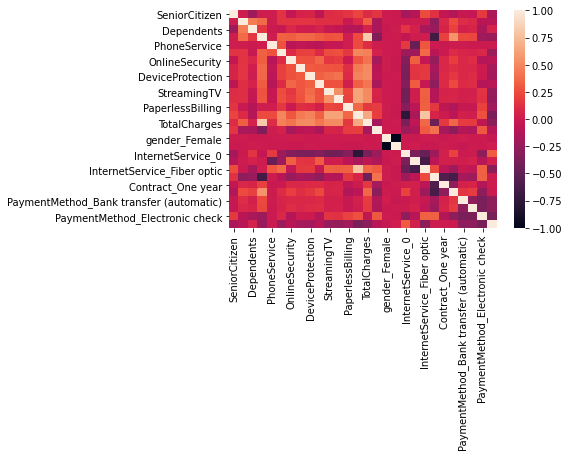

In [160]:
sns.heatmap(df_train.corr())
print("Toute les variables sont moyennement corrélées, \n même si on note une plus forte corrélation négative avec la tenure \n (moins longtemps le client est abonné plus il a de chance d'être désabonné). \n On voit aussi que le sexe n'a pas d'impact")

## <h2>3.  Modelisation</H2>

In [161]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop("Churn", axis=1), df_train["Churn"], test_size=0.3, random_state= 123)
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)
y_train = np.ascontiguousarray(y_train)
y_test = np.ascontiguousarray(y_test)

In [162]:
def print_score(predict, y_test):
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, predict)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, predict)))   
        print("AUC : \n {}\n".format(roc_auc_score(y_test, predict)))    

<h2>a.	Random forest</h2>

In [24]:
#### parameters distribution
param_distribs_rf = {
        'n_estimators': randint(low=200, high=1000),
        'max_features': randint(low=1, high=8),
        'max_depth': randint(low=3, high=8),
        "min_samples_split": randint(low=5, high=10),
        "min_samples_leaf": randint(low=3, high=6),
        "bootstrap": [True],
        "criterion": ["gini"]
    }

rf_clf = RandomForestClassifier(random_state=123)
RS_rf = RandomizedSearchCV(rf_clf, param_distributions=param_distribs_rf,
                                n_iter=100, cv=5, scoring='accuracy', random_state=123, verbose = 1, n_jobs=-1)

RS_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9159890bd0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f91598908d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9159888090>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9159890e50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9159890850>},
                   random_state=123, scoring='accuracy', verbose=1)

In [25]:
print("Best parameters {}".format(RS_rf.best_params_))
print("Best score {:.4f}".format(RS_rf.best_score_))

pred_rf = RS_rf.best_estimator_.predict(X_test)
print_score(pred_rf, y_test)

Best parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 591}
Best score 0.7976
Test Result:

accuracy score: 0.8118

Confusion Matrix: 
 [[1321   97]
 [ 261  223]]

AUC : 
 0.6961687978645281



<h2>b. XGBoost</h2>

In [26]:
### parameters distribution
param_distribs_xgb = {"max_depth":  [2,4,8],
              "learning_rate":  [0.25, 0.1, 0.05, 0.01],
              "reg_alpha": np.linspace(0.5, 5,3 ),
              "reg_lambda": np.linspace(0.5, 5,3),
              "gamma": np.linspace(0.5, 5,3),
              "n_estimators" :randint(low=200, high=1000)}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False)
RS_xgb = RandomizedSearchCV(xgb_clf, param_distributions=param_distribs_xgb,
                                n_iter=100, cv=5, scoring='accuracy', random_state=123,verbose = 1, n_jobs=-1)

RS_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 14.1min finished


[20:45:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=100, n_jobs=-1,
          

In [27]:
print("Best parameters {}".format(RS_xgb.best_params_))
print("Best score {:.4f}".format(RS_xgb.best_score_))

pred_xgb = RS_xgb.best_estimator_.predict(X_test)
print_score(pred_xgb, y_test)

Best parameters {'gamma': 0.5, 'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 849, 'reg_alpha': 5.0, 'reg_lambda': 2.75}
Best score 0.8000
Test Result:

accuracy score: 0.8123

Confusion Matrix: 
 [[1293  125]
 [ 232  252]]

AUC : 
 0.7162544149016774



<h2>b. ANN</h2>

In [126]:

def neural_network(learning_rate=1.0e-05):
    model = Sequential()
    model.add(Dense(32,activation='tanh',input_shape=[len(X_train[0])]))
    model.add(Dropout(rate=.1))
    model.add(Dense(64,activation='tanh'))
    model.add(Dropout(rate=.1))
    model.add(Dense(16,activation='tanh'))
    model.add(Dropout(rate=.1))
    model.add(Dense(1,activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=neural_network,verbose=0)

learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
epochs = [200]
batch_size = [100] 
param_grid = dict(epochs=epochs, batch_size=batch_size, learning_rate=learn_rate)

grid = RandomizedSearchCV(estimator=model,param_distributions=param_grid,
                                n_iter=100, cv=5, scoring='accuracy', random_state=123, verbose = 1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

/Users/raphaelrobert/py_projects/virtual_environment/md4/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 5 is smaller than n_iter=100. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.1min finished


In [127]:
print("Best parameters {}".format(grid_result.best_params_))
print("Best score {:.4f}".format(grid_result.best_score_))

pred_ann = grid_result.best_estimator_.predict(X_test)
print_score(pred_ann, y_test)

Best parameters {'learning_rate': 0.001, 'epochs': 200, 'batch_size': 100}
Best score 0.7852
Test Result:

accuracy score: 0.7923

Confusion Matrix: 
 [[1282  136]
 [ 259  225]]

AUC : 
 0.6844831505204629



/Users/raphaelrobert/py_projects/virtual_environment/md4/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## <h2>3.  Prédiction</h2>

In [176]:
print("Nous avons choisis le modèle XGBoost avec un meilleur score de 80% et une accuracy de 81%")

Nous avons choisis le modèle XGBoost avec un meilleur score de 80% et une accuracy de 81%


In [177]:
df_evaluation = pd.read_csv('evaluation.csv')
df_eval = df_evaluation.copy() #on copie juste pour afficher les prédiction sur dataset de base
df_eval = cleen_data(df_eval)

In [178]:
df_evaluation["probabilityOfChurn"] = [np.round(i[1]*100) for i in RS_xgb.best_estimator_.predict_proba(df_eval)]
df_evaluation["probabilityOfChurn_bin"] = RS_xgb.best_estimator_.predict(df_eval)
df_evaluation

/Users/raphaelrobert/py_projects/virtual_environment/md4/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,probabilityOfChurn,probabilityOfChurn_bin
0,0811-GSDTP,Female,0,No,Yes,13,No,No phone service,DSL,No,...,No,No,No,Month-to-month,No,Electronic check,30.15,382.20,23.0,0
1,1970-KKFWL,Female,0,No,No,35,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.30,797.10,2.0,0
2,2892-GESUL,Female,0,Yes,Yes,18,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,309.25,2.0,0
3,2842-BCQGE,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),75.35,3161.40,33.0,0
4,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,1689-MRZQR,Male,0,Yes,Yes,34,Yes,No,Fiber optic,No,...,No,Yes,No,Month-to-month,No,Electronic check,78.30,2564.30,36.0,0
701,6181-AXXYF,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,1859.10,1.0,0
702,7833-PKIHD,Male,0,Yes,Yes,51,Yes,No,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),76.40,3966.30,6.0,0
703,6230-BSUXY,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,85.00,86.0,1


In [179]:
df_evaluation.to_csv(r'./predictions.csv', header=True)